In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import joblib

# Detect Ransomware, Phishing, and Trojan.

In [2]:
# Load the dataset
df3 = pd.read_csv("./datasets/Trojan_Detection.csv")
df3
# Remove leading underscores and replace special characters with underscores in column names
df3.columns = df3.columns.str.lstrip('_').str.replace('[^a-zA-Z0-9]', '_', regex=True)

In [3]:
# Check the column names to verify spelling and case
print(df3.columns)

Index(['Unnamed__0', 'Flow_ID', '_Source_IP', '_Source_Port',
       '_Destination_IP', '_Destination_Port', '_Protocol', '_Timestamp',
       '_Flow_Duration', '_Total_Fwd_Packets', '_Total_Backward_Packets',
       'Total_Length_of_Fwd_Packets', '_Total_Length_of_Bwd_Packets',
       '_Fwd_Packet_Length_Max', '_Fwd_Packet_Length_Min',
       '_Fwd_Packet_Length_Mean', '_Fwd_Packet_Length_Std',
       'Bwd_Packet_Length_Max', '_Bwd_Packet_Length_Min',
       '_Bwd_Packet_Length_Mean', '_Bwd_Packet_Length_Std', 'Flow_Bytes_s',
       '_Flow_Packets_s', '_Flow_IAT_Mean', '_Flow_IAT_Std', '_Flow_IAT_Max',
       '_Flow_IAT_Min', 'Fwd_IAT_Total', '_Fwd_IAT_Mean', '_Fwd_IAT_Std',
       '_Fwd_IAT_Max', '_Fwd_IAT_Min', 'Bwd_IAT_Total', '_Bwd_IAT_Mean',
       '_Bwd_IAT_Std', '_Bwd_IAT_Max', '_Bwd_IAT_Min', 'Fwd_PSH_Flags',
       '_Bwd_PSH_Flags', '_Fwd_URG_Flags', '_Bwd_URG_Flags',
       '_Fwd_Header_Length', '_Bwd_Header_Length', 'Fwd_Packets_s',
       '_Bwd_Packets_s', '_Min_Packet_Len

In [6]:
# Remove columns with special characters from feature names
columns_to_drop = ['Class', 'Flow_ID', '_Source_IP', '_Destination_IP', '_Timestamp']
x3 = df3.drop(columns=columns_to_drop)
y3 = df3['Class']

# Split the dataset into training and testing sets
x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size=0.2, random_state=42)

# Define the LightGBM classifier
clf = lgb.LGBMClassifier()

# Train the classifier on the training data
clf.fit(x3_train, y3_train)

# Save the trained model to a file
joblib.dump(clf, './trained_model/LGBM_model.pkl')

[LightGBM] [Info] Number of positive: 72623, number of negative: 69362
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.042768 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 14828
[LightGBM] [Info] Number of data points in the train set: 141985, number of used features: 69
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.511484 -> initscore=0.045943
[LightGBM] [Info] Start training from score 0.045943
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

['./trained_model/LGBM_model.pkl']

Accuracy: 0.9999154858157028
Classification Report:
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00     17437
      Trojan       1.00      1.00      1.00     18060

    accuracy                           1.00     35497
   macro avg       1.00      1.00      1.00     35497
weighted avg       1.00      1.00      1.00     35497



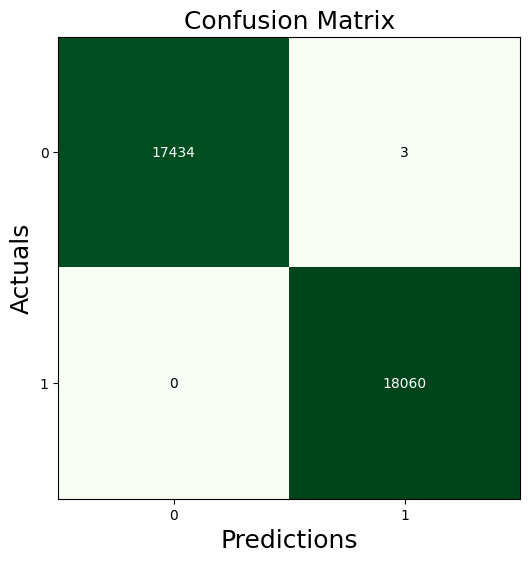

In [7]:

# Evaluate the model's performance on the testing data
accuracy = clf.score(x3_test, y3_test)
print("Accuracy:", accuracy)

# Generate classification report
y3_pred = clf.predict(x3_test)
print("Classification Report:")
print(classification_report(y3_test, y3_pred))

cm3=confusion_matrix(y3_test, y3_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm3 , figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

Accuracy: 0.9999154858157028
Classification Report:
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00     17437
      Trojan       1.00      1.00      1.00     18060

    accuracy                           1.00     35497
   macro avg       1.00      1.00      1.00     35497
weighted avg       1.00      1.00      1.00     35497



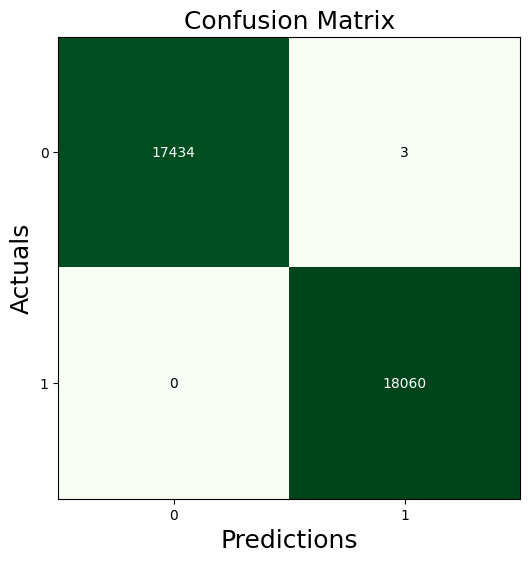

In [8]:
# Split the dataset into training and testing sets
x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size=0.2, random_state=42)

# Load the trained LightGBM model
loaded_model = joblib.load('./trained_model/LGBM_model.pkl')  # Load the model from the saved file

# Evaluate the model's performance on the testing data
accuracy = clf.score(x3_test, y3_test)
print("Accuracy:", accuracy)

# Make predictions using the loaded model on the testing data
y3_pred = loaded_model.predict(x3_test)

# Print classification report
print("Classification Report:")
print(classification_report(y3_test, y3_pred))

# Plot confusion matrix
cm3=confusion_matrix(y3_test, y3_pred)

fig, ax = plot_confusion_matrix(conf_mat=cm3 , figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()